In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy

from scipy import stats

# Problem 1

## A.

For my value of X I choose 6, which is the average cosmic-ray background. For Y, the average number of gamma-rays emitted by our hypothetical source, I choose 10.

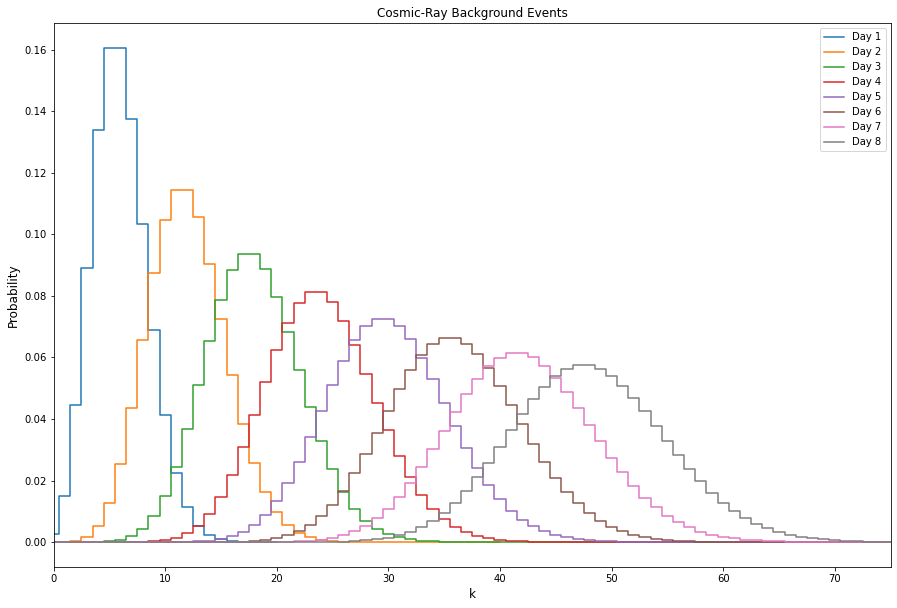

In [2]:
k = np.linspace(0, 20, 21)
mu = 6

oneDay = stats.poisson.pmf(k, mu)

plt.rcParams["figure.figsize"] = (15, 10)
plt.xlim(0, 75)
plt.title(f'Cosmic-Ray Background Events', fontsize='large')
plt.xlabel('k',fontsize='large')
plt.ylabel('Probability',fontsize='large')
plt.step(k, oneDay, where = 'mid', label = "Day 1")

poissonDist = np.convolve(oneDay, oneDay)
k2 = np.linspace(0, 40, 41)

plt.step(k2, poissonDist, where = 'mid', label = "Day 2")

constant = 40
for i in range(6):
    constant += 20
    poissonDist = np.convolve(poissonDist, oneDay)
    plt.step(np.linspace(0, constant, constant + 1), poissonDist, where = 'mid', label = "Day " + str(i+3))
    
plt.legend()

This is the Poisson distribution over a time interval of one day, an expected value of 6 events per day. As we increase our interval of time, we get a wider spread of values, as to be expected.

## B.

Let's pick a time interval of 8 days, which is where our last convolution ended up at. We can show this is a Poisson distribution by plotting another Poisson from scratch, and comparing it to our series of convolutions.

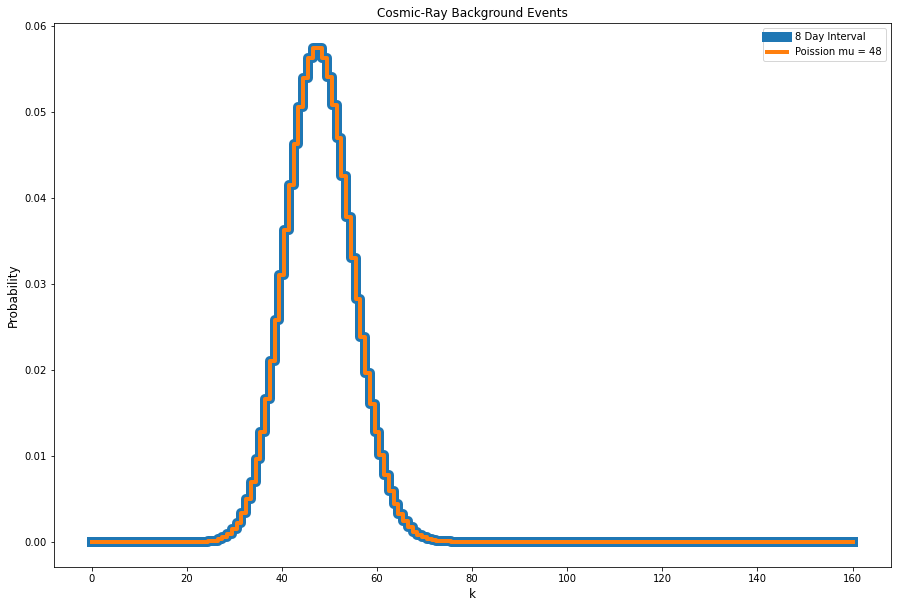

In [3]:
x = np.linspace(0, constant, constant + 1)
plt.step(x, poissonDist, where = 'mid', label = "8 Day Interval", linewidth = 10)
plt.step(x, stats.poisson.pmf(x, 48), where = 'mid', label = "Poission mu = 48", linewidth = 4)

plt.title(f'Cosmic-Ray Background Events', fontsize='large')
plt.xlabel('k',fontsize='large')
plt.ylabel('Probability',fontsize='large')

plt.legend()

Here is a clear demonstration of the convolved probability distribution still being a Poisson distribution. Here, we plotted the probability mass function of the convolved function directly on top of a Poisson distribution defined with parameter $\mu = 48$, and we get an identical plot.

Conceptually, we know that the Poisson distribution is defined by a value, mu, of discrete events that are independent of one another within a single time frame. The occurrence of a single event doesn't affect the probability of other occurrences, and we are simply finding the probability of k events within that time frame.

When we have a single Poisson distribution, and we already know it fulfills these desired properties of a Poisson distribution, the sum of Poisson distributions will also satisfy these properties, and therefore, will also be a Poisson distribution.

## C.

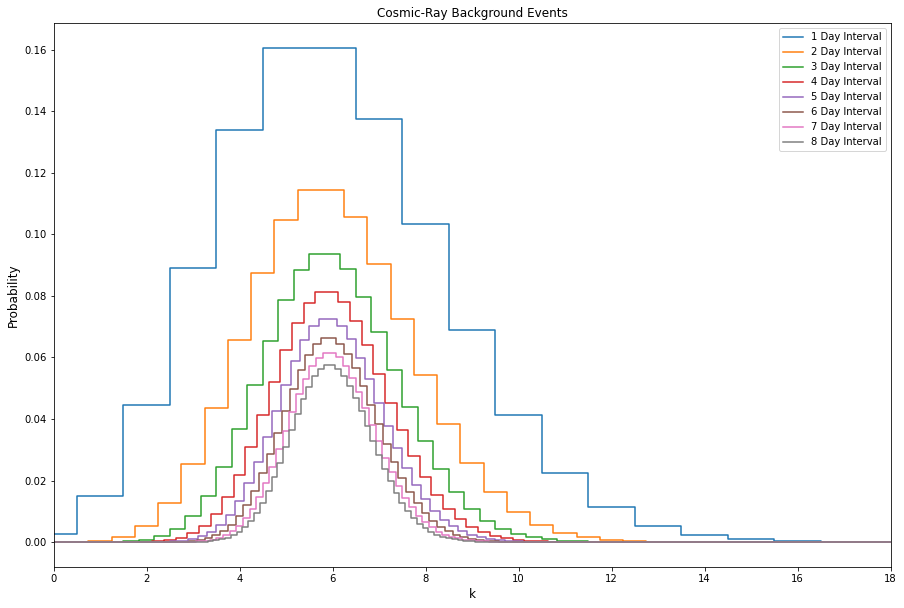

In [4]:
k = np.linspace(0, 20, 21)
mu = 6

oneDay = stats.poisson.pmf(k, mu)

plt.rcParams["figure.figsize"] = (15, 10)
plt.xlim(0, 18)
plt.title(f'Cosmic-Ray Background Events', fontsize='large')
plt.xlabel('k',fontsize='large')
plt.ylabel('Probability',fontsize='large')
plt.step(k, oneDay, where = 'mid', label = "1 Day Interval")

poissonDist = np.convolve(oneDay, oneDay)
k2 = np.linspace(0, 40, 41)

plt.step(k2/2, poissonDist, where = 'mid', label = "2 Day Interval")

constant = 40
for i in range(3, 9):
    constant += 20
    poissonDist = np.convolve(poissonDist, oneDay)
    plt.step(np.linspace(0, constant, constant + 1)/(i), poissonDist, where = 'mid', label = str(i) + " Day Interval")
    
plt.legend()

As we see here, as we average days for each of these convolutions, we start to see the distribution look more symmetrical. We still have a Poisson distribution, because we are still measuring for discrete number of independent events within different time intervals, however it starts to look more Gaussian-like. Regarding the central limit theorem, it explains that when we sum independent, random variables, they will tend towards a normal distribution. This is because the lower probabilities become increasingly unlikely the larger the sums. The great part, is that the variables themselves do not have to be normally distributed. And this is exactly what is being demonstrated here.

## D.

Let us choose a number of days, N = 8, so we can pick up off where we left our poisson distribution. We assume that we saw $Y*N$ gamma rays, or $10*8$ = 80 gamma rays within this 8 day time period. Because the signal of our Poisson distribution was defined by the average cosmic ray "background", the background of our signal will be due to the rays from our source.

### Therefore, to word out our problem: What is the probability our background signal (the gamma ray source) produced a signal as signal-like or more than our measurement of 80 gamma rays?

This is accomplished with an integral from our measurement to infinity with the probability distribution we found earlier. Then, we can calculate our sigma value relative to its corresponding Gaussian. Because we have already calculated our probabilities, we can simply sum the values we want in our discrete distribution.

In [5]:
probability = sum(poissonDist[80:])
print(probability)

1.4975688618735122e-05


Now, we just need to find the corresponding sigma.

In [6]:
stats.norm.ppf(1-probability)

4.17383571424805

# Problem 2

## A.

Let's choose a random Rayleigh distribution to describe our background over some interval.

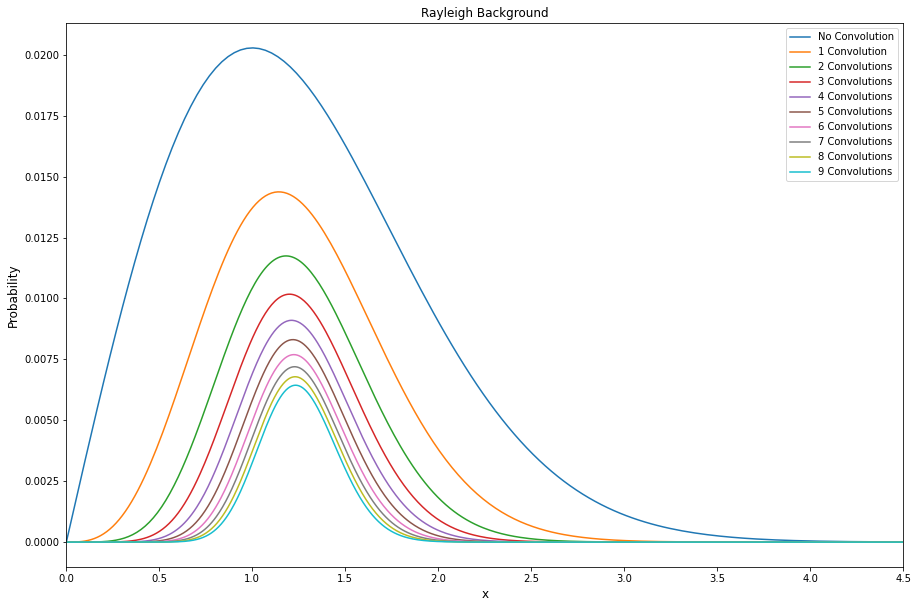

In [7]:
x = np.linspace(0, 10, 300)

singleRayleigh = stats.rayleigh.pdf(x)
singleRayleigh = singleRayleigh/sum(singleRayleigh)

plt.xlim(0, 4.5)
plt.rcParams["figure.figsize"] = (15, 10)
plt.title(f'Rayleigh Background', fontsize='large')
plt.xlabel('x',fontsize='large')
plt.ylabel('Probability',fontsize='large')
plt.plot(x, singleRayleigh, label = "No Convolution")

rayleighDist = np.convolve(singleRayleigh, singleRayleigh)
plt.plot(np.linspace(0, 20, 599)/2, rayleighDist, label = "1 Convolution")

domayne = 20
constant = 599
for i in range(2, 10):
    domayne += 10
    constant += 300
    rayleighDist = np.convolve(rayleighDist, singleRayleigh)
    plt.plot(np.linspace(0, domayne, constant + (1-i))/(i+1), rayleighDist, label = str(i) + " Convolutions")
    
plt.legend()

## B.

We have an initial Rayleigh distribution. The Rayleigh distribution is a skewed, continuous distribution, however, as we continue to convolve the Rayleigh with itself multiple times, we see another demonstration of Central Limit Theorem. After roughly 5 or 6 convolutions do we begin to see the classic Gaussian shape.

# Problem 3

From the context of our problem, we know that we have a zero-mean Gaussian with a width of X. Let's choose X to be 4. And we get to choose our signal strength, of a floating point number, so let us define Y to be 30.

## Version 1.

From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution $X = 4$. Assuming you see a signal of strength $Y = 30$. Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

### Question: What is the probability of the background producing a signal greater than or equal to a strength of Y = 30?

We already know our probability distribution is a Gaussian and its parameters, so then we directly calculate the probability value relevant to our question by integrating from 2.5 to positive infinity.

In [8]:
prob = 1 - stats.norm.cdf(30, scale = 4)
print(prob)

3.186340080674199e-14


Then we can find the corresponding sigma value, relative to a standard normal distribution.

In [9]:
stats.norm.ppf(1-prob)

7.500187107103627

~7.5$\sigma$ is a significant value! This is near our convention of 5$\sigma$ being a significant discovery, and it is almost certain it is coming from our signal of interest, rather than the background.

## Version 2.

### B.
If you have to look for a signal in 10k pixels, what is the probability distribution of your background?

To understand how we tackle this question, state the statistical question at hand.

### Question: What is the probability of finding a signal of our candidate, over a sample of 10k trials (in this case, 10k pixels)?

We can reevaluate our initial probability distribution by multiplying the overall curve by ten thousand.

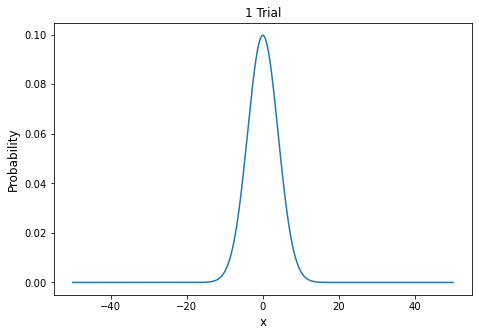

In [10]:
x = np.linspace(-50, 50, 12801)
originalDist = stats.norm.pdf(x, scale = 4)
numPixs = 10000

plt.rcParams["figure.figsize"] = (7.5, 5)
plt.title(f'1 Trial', fontsize='large')
plt.xlabel('x',fontsize='large')
plt.ylabel('Probability',fontsize='large')
plt.plot(x, originalDist)

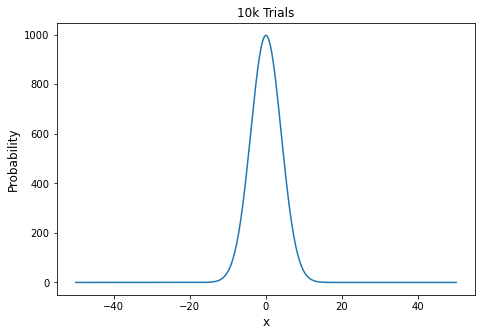

In [11]:
plt.rcParams["figure.figsize"] = (7.5, 5)
tenKTrials = originalDist*numPixs
plt.title(f'10k Trials', fontsize='large')
plt.xlabel('x',fontsize='large')
plt.ylabel('Probability',fontsize='large')
plt.plot(x, tenKTrials)

### C.

Assuming the same signal as Version 1, let's calculate the significance of our detection from the overall sample of 10000 pixels.
Let's normalize our distribution by dividing by the sum, then integrating to the right of our candidate signal (we will approximate this by summing all values within our discrete linspace).

In [12]:
# normalizedDist = tenKTrials/sum(tenKTrials)
# no need to normalize

indexOfCandidate = np.where(x == 30)[0][0]
approxProb = sum(tenKTrials[indexOfCandidate:])

print(approxProb)

4.114844637304334e-08


Then we can compare our approximate probability with a standard normal distribution to get a new value of $X\sigma$.

In [13]:
stats.norm.ppf(1-approxProb)

5.362018974545791

Over the course of 10k trials, we ended up getting a sigma value of $\approx 5.36$. This is a smaller value than what we got before! Notice how the significance of rare values got smaller over a larger amount of trials.

# Problem 4

Assuming the same parameters as our Gaussian background as in the previous problem...

### A. What is the signal required for a 5$\sigma$ detection in Version 1, or in a single trial?

Because our single trial is already a zero-mean Gaussian, with standard deviation of 4, we can directly calculate our 5$\sigma$ value. This wil correspond to a signal of strength $5*4 = 20$.

### B. What is the signal required for a 5$\sigma$ detection in Version 2, or in ten thousand trials?

In [14]:
prob5Sigma = 1/3.5e6
print(prob5Sigma)

2.857142857142857e-07


In [20]:
x = np.linspace(-100,100,10000)
dist = stats.norm.pdf(x, scale=4)
dist10K = dist*10000

prob = 0
idx = 0
while prob < stats.norm.sf(5):
    idx += 1
    prob += dist10K[-idx]
idx = 9999 - idx

fiveSig = x[idx]
print(fiveSig)

28.43284328432844


Here we have calculated the threshold of values for the strength of a signal to be statistically significant over ten thousand trials! We need a minimum of a strength of 28.43-ish.

### C.

The signal must larger by nearly a factor of 1/2 with a trials factor of 10k. If you look at the graphs of the probability distributions above, with 10k trials, the magnitude of the entire distribution is much higher. So if we try to find an equivalent probability density, we must look extremely deep into the tails, where the tails were approaching zero. This is why the signal only grew a couple of orders of magnitude (sensitivity penalty) relative to the large trials factor.

### D.

If you changed the trials factor significantly, the effect on the 5-sigma sensitivity threshold appears to grow in a logarithmic pattern.

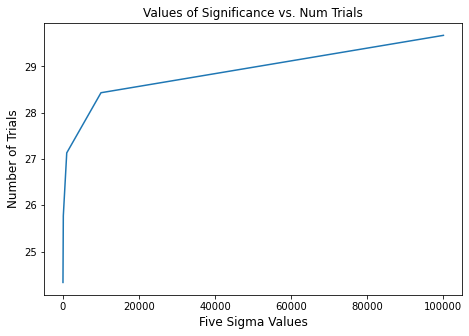

In [25]:
five_sig_vals = []
trial_nums = []

trials = 10
for i in range(1, 6):
    prob = 0
    idx = 0
    distTrials = stats.norm.pdf(x, scale=4)
    distTrials = distTrials*trials
    while prob < stats.norm.sf(5):
        idx += 1
        prob += distTrials[-idx]
    idx = len(x) - 1 - idx
    
    trial_nums.append(trials)
    five_sig_vals.append(x[idx])
    trials *= 10

plt.rcParams["figure.figsize"] = (7.5, 5)
plt.title(f'Values of Significance vs. Num Trials', fontsize='large')
plt.xlabel('Five Sigma Values',fontsize='large')
plt.ylabel('Number of Trials',fontsize='large')
plt.plot(trial_nums, five_sig_vals)